In [1]:
# Never mess with this preamble.  
import sys
sys.path.insert(1, '.\Library_Files')
import DiffeqSolver as DE
import numpy as np

### Problem Formulation
Throughout, we want to solve the initial-value problem

$$
\frac{dy}{dt} = y + t, ~ y(0) = 3
$$

which, using the method of multipliers, we can solve exactly, so that from

$$
\frac{d}{dt}\left(ye^{-t} \right) = te^{-t},
$$

we find that 

$$
y(t) = 4e^{t} - (t+1). 
$$

### Numerical Solver Setup
To study this problem numerically, we first define for the right-hand side

$$
f(t,y) = t + y
$$

a numerical solver for the time-step size $\delta t =.1$, over the interval $0\leq t \leq 2$ so that $t_{0}=0$ and $t_{f}=2$.

In [2]:
fun = lambda t, y: (t+y)
dt = .1
t0 = 0.
tf = 2.
y0 = 3.
mysolver = DE.DiffeqSolver(dt, t0, tf, y0, fun, 'f_t+y')

The first numerical approach we use is Euler's Method, which discretely approximates the ODE 

$$
\frac{dy}{dt} = f(t,y), ~ y(0) = y_{0}
$$

via the formula

$$
\tilde{y}_{n+1} = \tilde{y}_{n} + \delta t f(t_{n}, \tilde{y}_{n}), ~n\geq 0, ~ \tilde{y}_{0} = y_{0}
$$

where in the end, we hope that $y(t_{n}) \approx \tilde{y}_{n}$.  The results of our approach are plotted below.  

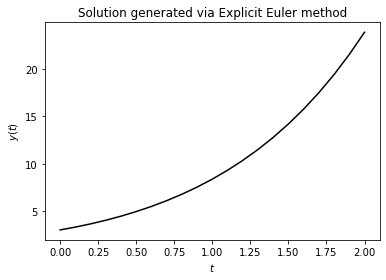

In [3]:
mysolver.ExplicitEuler()

The next approach we try is Heun's Method, which approximates the ODE via the formula

\begin{align}
k_1 = & \delta t f(t_{n},\tilde{y}_{n}) \\
k_2 = & \delta t f(t_{n}+\delta t,\tilde{y}_{n} + k_1) \\
\tilde{y}_{n+1} = & \tilde{y}_{n} + \frac{1}{2}\left( k_{1} + k_{2}\right) \\
\end{align}

The results are plotted below.

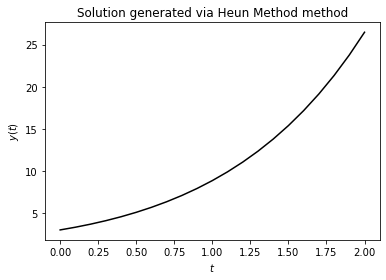

In [4]:
mysolver.HeunMethod()

The last approach we try is the Runge-Kutta 4 Method, which approximates the ODE via the formula

\begin{align}
k_1 = & \delta t f(t_{n},\tilde{y}_{n}) \\
k_2 = & \delta t f(t_{n}+\delta t/2,\tilde{y}_{n} + k_1/2) \\
k_3 = & \delta t f(t_{n}+\delta t/2,\tilde{y}_{n} + k_2/2) \\
k_4 = & \delta t f(t_{n}+\delta t,\tilde{y}_{n} + k_3) \\
\tilde{y}_{n+1} = & \tilde{y}_{n} + \frac{1}{6}\left( k_{1} + 2k_{2} + 2k_{3} + k_{4}\right) \\
\end{align}

The results are plotted below.

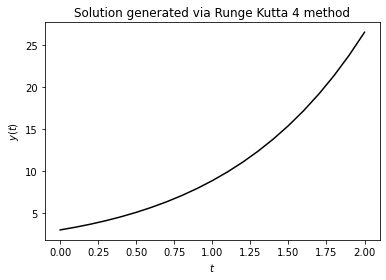

In [5]:
mysolver.RungeKutta4()

As we can see though, while all of the above plots look fine, it is difficult without plotting them at once to see which methods are performing well compared to one another.  Thus we plot all of the approximations as well as the true solution below.  

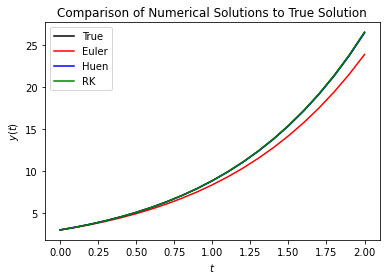

In [6]:
ftrue = lambda t: 4.*np.exp(t) - (t+1.)
mysolver.PlotCompare(ftrue)

From this plot, we clearly see that Runge Kutta and Heun's Method outperform Euler's Method, as we would expect from lecture.  However, it is difficult from this graph to see the differences between Huen's Method and Runge Kutta.  Thus, we also generate a table of the approximate solutions compared to the true solution at every time step.  As seen below, clearly Runge Kutta is markedly more accurate than even Huen's method.  

In [7]:
mysolver.TableCompare(ftrue)

|   Time |     True |    Euler |     Heun |      RK4 |
|-------:|---------:|---------:|---------:|---------:|
|    0   |  3       |  3       |  3       |  3       |
|    0.1 |  3.32068 |  3.3     |  3.32    |  3.32068 |
|    0.2 |  3.68561 |  3.64    |  3.6841  |  3.68561 |
|    0.3 |  4.09944 |  4.024   |  4.09693 |  4.09943 |
|    0.4 |  4.5673  |  4.4564  |  4.56361 |  4.5673  |
|    0.5 |  5.09489 |  4.94204 |  5.08979 |  5.09488 |
|    0.6 |  5.68848 |  5.48624 |  5.68171 |  5.68847 |
|    0.7 |  6.35501 |  6.09487 |  6.34629 |  6.35501 |
|    0.8 |  7.10216 |  6.77436 |  7.09116 |  7.10216 |
|    0.9 |  7.93841 |  7.53179 |  7.92473 |  7.93841 |
|    1   |  8.87313 |  8.37497 |  8.85632 |  8.87312 |
|    1.1 |  9.91666 |  9.31247 |  9.89624 |  9.91665 |
|    1.2 | 11.0805  | 10.3537  | 11.0558  | 11.0805  |
|    1.3 | 12.3772  | 11.5091  | 12.3477  | 12.3772  |
|    1.4 | 13.8208  | 12.79    | 13.7857  | 13.8208  |
|    1.5 | 15.4268  | 14.209   | 15.3852  | 15.4267  |
|    1.6 |